In [60]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [61]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

1. ¿Cuál es el perfil de un/una analista de datos?

Perfil del analista de datos: género, edad, nivel de estudios más alto alcanzado, cuánto llevan programando. Estado de la brecha de género.

¿Cuál es el perfil de un analista de datos?

Q1-edad

Q2-genero

Q3-país . Tal vez agrupar por continente o lo que veamos.

Q4-educación.

Q5- Ocupación. Tal vez agrupar por técnico, perfil de producto, estudiante

Q6- Experiencia. Está en rangos

In [62]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   q1_edad              25973 non-null  object
 1   q2_genero            25973 non-null  object
 2   q3_país              25973 non-null  object
 3   q4_educacion         25973 non-null  object
 4   q5_ocupacion         25973 non-null  object
 5   q6_exp_tech          25973 non-null  object
 6   q8_l_recomendado     24940 non-null  object
 7   q11_tipo_plataforma  24720 non-null  object
 8   q20_i_actual         16325 non-null  object
 9   q21_tamanio_cia      16251 non-null  object
 10  q22_da_cia           16126 non-null  object
 11  q25_salario          15391 non-null  object
 12  q26_ppto_ml_cc       15183 non-null  object
 13  q33_bigdata_product  4656 non-null   object
 14  q35_h_i_negocios     2237 non-null   object
 15  q41_h_process_data   18489 non-null  object
 16  q7_l

Borrar columnas que no responden a la pregunta:

In [64]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [65]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [66]:
df_perfil = df.drop(columns = lista_eliminar, axis=1)

In [67]:
df_perfil.head(10)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
4,45-49,Man,India,Doctoral degree,Other,< 1 years
5,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years
6,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years
7,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years
8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years
9,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years


In [68]:
df_perfil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   q1_edad       25973 non-null  object
 1   q2_genero     25973 non-null  object
 2   q3_país       25973 non-null  object
 3   q4_educacion  25973 non-null  object
 4   q5_ocupacion  25973 non-null  object
 5   q6_exp_tech   25973 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [69]:
df_perfil.shape

(25973, 6)

In [70]:
df_perfil.stb.missing()

,missing,total,percent
q1_edad,0,25973,0.0
q2_genero,0,25973,0.0
q3_país,0,25973,0.0
q4_educacion,0,25973,0.0
q5_ocupacion,0,25973,0.0
q6_exp_tech,0,25973,0.0


In [71]:
df_perfil.duplicated().sum()

11070

In [72]:
df_perfil.duplicated(["q1_edad"]).sum()

25962

In [73]:
df_perfil[df_perfil.duplicated(["q1_edad"] , False)].head(10)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years
4,45-49,Man,India,Doctoral degree,Other,< 1 years
5,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years
6,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years
7,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years
8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,3-5 years
9,30-34,Man,Turkey,I prefer not to answer,Other,1-3 years


Countplot y ordenar los rangos. Se ordena el dataframe o un value counts para hacer la gráfica y se hace barplot

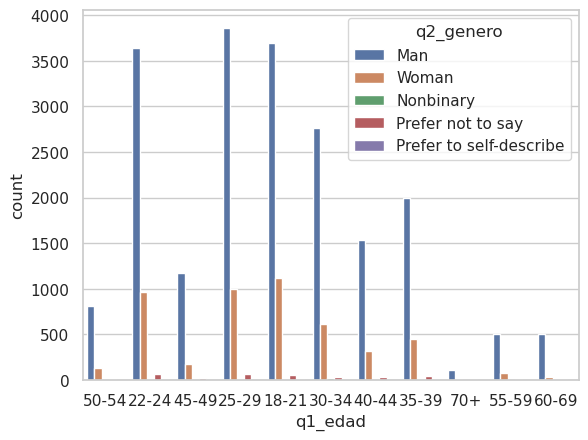

In [74]:
sns.countplot(data=df_perfil , x= "q1_edad", hue= "q2_genero");

In [75]:
df_perfil.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech'],
      dtype='object')

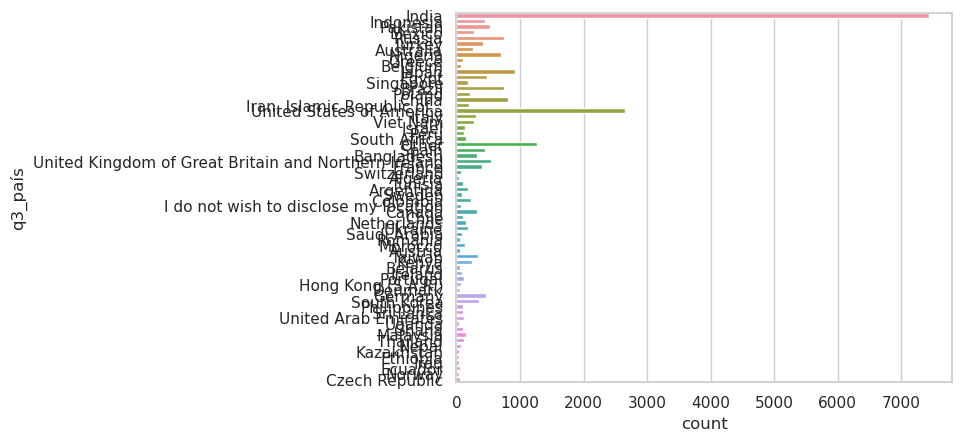

In [76]:
sns.countplot(data=df_perfil , y= 'q3_país');

In [77]:
df['q4_educacion'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: q4_educacion, dtype: int64

In [78]:
df_ocupacion = df_perfil.q5_ocupacion.value_counts().reset_index()

In [79]:
df_ocupacion.head()

,index,q5_ocupacion
0,Student,6804
1,Data Scientist,3616
2,Software Engineer,2449
3,Other,2393
4,Data Analyst,2301


<AxesSubplot:xlabel='q5_ocupacion', ylabel='index'>

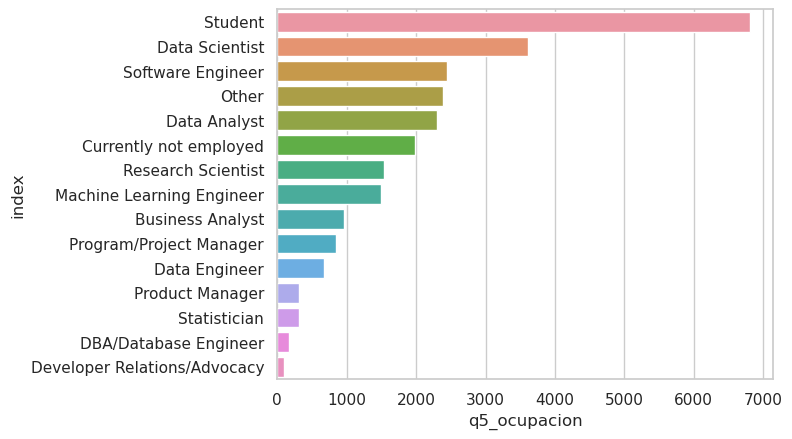

In [80]:
sns.barplot( y = "index" , x= "q5_ocupacion" , data=df_ocupacion )

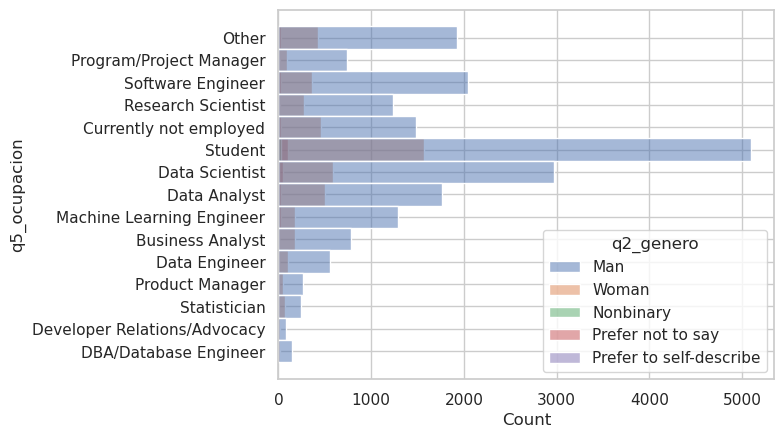

In [81]:
fig = sns.histplot(y= "q5_ocupacion",  data=df, hue="q2_genero" )

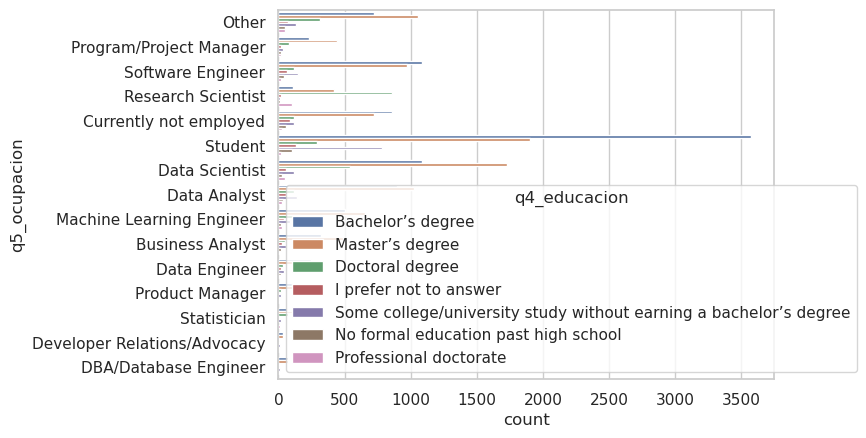

In [82]:
sns.countplot(data=df_perfil , y= "q5_ocupacion" , hue= 'q4_educacion');

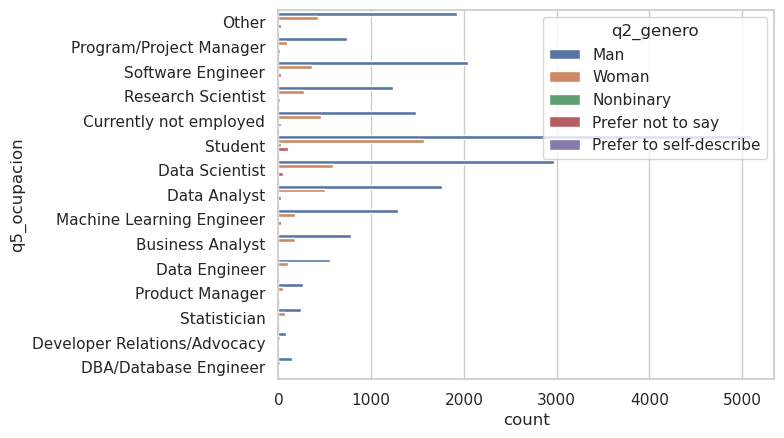

In [83]:
sns.countplot(data=df_perfil , y= 'q5_ocupacion', hue=  "q2_genero");

In [84]:
df_perfil.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech'],
      dtype='object')

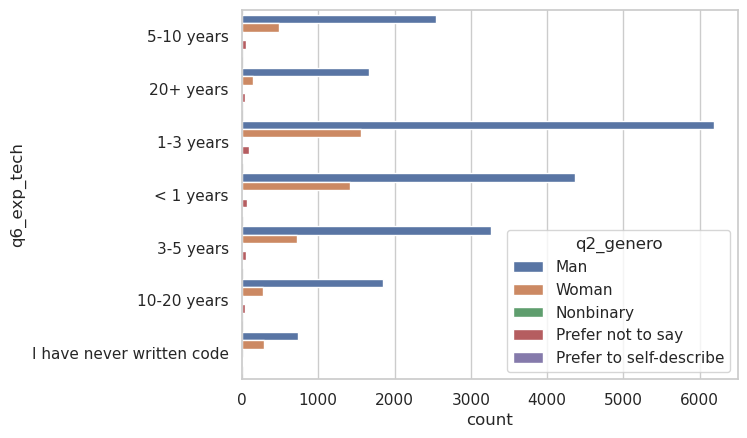

In [85]:
sns.countplot(data=df_perfil , y= 'q6_exp_tech', hue=  "q2_genero");

# ¿En qué países hay más analistas de datos?

In [86]:
df_analista = df_perfil[df_perfil['q5_ocupacion'] == 'Data Analyst']


In [87]:
import pandas as pd
import sidetable as stb

In [88]:
df_analista_España= df_analista[df_analista['q3_país'] == 'Spain']

In [89]:
df_analista_sinEspaña_sinOther= df_analista[(df_analista['q3_país'] != 'Spain') & (df_analista['q3_país'] != 'Other')]

In [90]:
df_analista_sinOther= df_analista[df_analista['q3_país'] != 'Other']

In [91]:
df_analista.stb.freq(['q3_país'])[:31]

,q3_país,count,percent,cumulative_count,cumulative_percent
0,India,564,24.511082,564,24.511082
1,United States of America,258,11.212516,822,35.723598
2,Other,135,5.867014,957,41.590613
3,Nigeria,102,4.432855,1059,46.023468
4,China,94,4.085180,1153,50.108648
5,Egypt,87,3.780965,1240,53.889613
6,Russia,68,2.955237,1308,56.844850
7,Brazil,64,2.781399,1372,59.626249
8,United Kingdom of Great Britain and Northern I...,53,2.303346,1425,61.929596
9,Japan,46,1.999131,1471,63.928727


In [92]:
df_analista_sinOther.reset_index #2166 personas encuestadas

<bound method DataFrame.reset_index of       q1_edad  q2_genero                   q3_país  \
16      50-54        Man                   Belgium   
32      22-24  Nonbinary  United States of America   
33      30-34      Woman                     Egypt   
46      22-24        Man                     China   
52      40-44        Man              South Africa   
...       ...        ...                       ...   
25954   25-29        Man                     India   
25959   18-21        Man                     India   
25965   18-21        Man                     India   
25966   30-34        Man                     India   
25968   30-34        Man                     Egypt   

                                            q4_educacion  q5_ocupacion  \
16                                     Bachelor’s degree  Data Analyst   
32     Some college/university study without earning ...  Data Analyst   
33                                     Bachelor’s degree  Data Analyst   
46     Some coll

In [93]:
df_paises = df_analista_sinOther.stb.freq(['q3_país'])[:21]

In [94]:
df_paises.head(21)

,q3_país,count,percent,cumulative_count,cumulative_percent
0,India,564,26.038781,564,26.038781
1,United States of America,258,11.911357,822,37.950139
2,Nigeria,102,4.709141,924,42.659280
3,China,94,4.339797,1018,46.999077
4,Egypt,87,4.016620,1105,51.015697
5,Russia,68,3.139428,1173,54.155125
6,Brazil,64,2.954755,1237,57.109880
7,United Kingdom of Great Britain and Northern I...,53,2.446907,1290,59.556787
8,Japan,46,2.123730,1336,61.680517
9,Indonesia,42,1.939058,1378,63.619575


In [95]:
df_paises2= df_paises.drop(df_paises.index[6:20], axis = 0)

In [96]:
df_paises2.head(20)

,q3_país,count,percent,cumulative_count,cumulative_percent
0,India,564,26.038781,564,26.038781
1,United States of America,258,11.911357,822,37.950139
2,Nigeria,102,4.709141,924,42.659280
3,China,94,4.339797,1018,46.999077
4,Egypt,87,4.016620,1105,51.015697
5,Russia,68,3.139428,1173,54.155125
20,Spain,28,1.292705,1738,80.240074


In [97]:
d4 = df_analista_sinOther.stb.freq(['q3_país']) #2166 personas encuestadas
d4['q3_país'].unique() #63 países + 1 'i do not wish to blabla my location'


array(['India', 'United States of America', 'Nigeria', 'China', 'Egypt',
       'Russia', 'Brazil',
       'United Kingdom of Great Britain and Northern Ireland', 'Japan',
       'Indonesia', 'Pakistan', 'Australia', 'Kenya', 'Canada', 'Germany',
       'Taiwan', 'South Korea', 'Mexico', 'France', 'Colombia', 'Spain',
       'Turkey', 'Poland', 'Bangladesh', 'Argentina', 'Ukraine', 'Peru',
       'Viet Nam', 'Singapore', 'Thailand', 'Philippines', 'Italy',
       'Ghana', 'Netherlands', 'Israel', 'Saudi Arabia', 'Malaysia',
       'Greece', 'Hong Kong (S.A.R.)', 'United Arab Emirates',
       'South Africa', 'Portugal', 'Iran, Islamic Republic of...',
       'Chile', 'Sweden', 'Ecuador', 'Morocco', 'Czech Republic',
       'Belgium', 'Sri Lanka', 'Nepal', 'Ireland',
       'I do not wish to disclose my location', 'Belarus', 'Tunisia',
       'Switzerland', 'Kazakhstan', 'Iraq', 'Uganda', 'Romania',
       'Austria', 'Norway', 'Ethiopia', 'Denmark'], dtype=object)

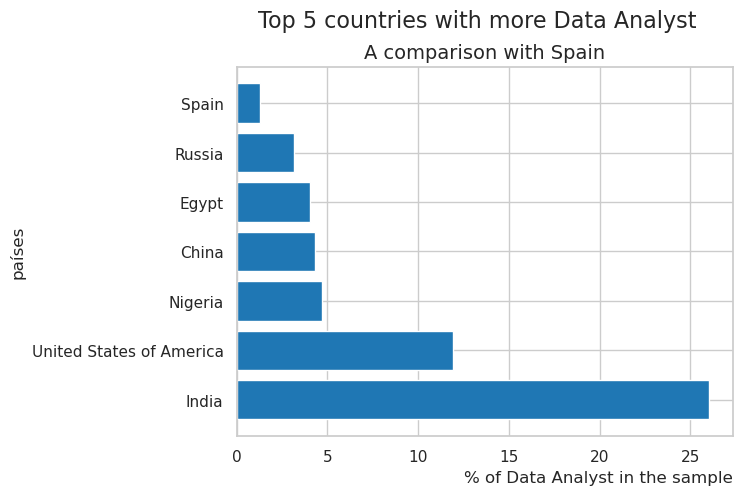

In [98]:
plt.figure()

plt.barh('q3_país', 'percent', data = df_paises2, color  = "tab:blue")
plt.title('A comparison with Spain',fontsize=14)
plt.suptitle('Top 5 countries with more Data Analyst',fontsize=16, y=1)


#plt.title('Top 6 countries with more Data Anayst')
plt.ylabel('países')
plt.xlabel('% of Data Analyst in the sample',loc = 'right' )
plt.show()


#España ocupa el puesto 20 de nuestra lista de 63 países que conforman nuestra muestra. Solo el 1,3 % de los encuestados son de este territorio. 	

¿En qué países se cobra mejor? ¿Cuánto se cobra en España de media como Analista? ¿Cuanto cobran las mujeres, cuánto los hombres, como analistas? 
¿Porcentaje desempleo en España como Analistas total encuestados?

Funciones exploracion

Propiedades

In [99]:
def propiedades(df):
    print(f'La forma de nuestro df es de ', df.shape)
    print ( '-------------------------------------------------------')
    print(f'Las columnas de nuestro df es ', df.columns)
    print ( '-------------------------------------------------------')
    print(f'El porcentaje de nulos por columna de nuestro df es', df.stb.missing())
    print (f' El dataframe de los nulso es :', pd.DataFrame(df.isnull().sum()*100/df.shape[0]))                                   
    print ( '-------------------------------------------------------')
    print(f'La info de nuestro df es', df.info())
    print ( '-------------------------------------------------------')
    print(f'La descripción de las variables númericas de nuestro df es ', df.select_dtypes(include=np.number))
    print ( '-------------------------------------------------------')
    print(f'La descripción de las variables categóricas de nuestro df es ', df.select_dtypes(include = "object"))
    print ( '-------------------------------------------------------')
    print(f'Los duplicados de nuestro df son ', df.duplicated())

In [100]:
propiedades (df_perfil)

La forma de nuestro df es de  (25973, 6)
-------------------------------------------------------
Las columnas de nuestro df es  Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech'],
      dtype='object')
-------------------------------------------------------
El porcentaje de nulos por columna de nuestro df es               missing  total  percent
q1_edad             0  25973      0.0
q2_genero           0  25973      0.0
q3_país             0  25973      0.0
q4_educacion        0  25973      0.0
q5_ocupacion        0  25973      0.0
q6_exp_tech         0  25973      0.0
 El dataframe de los nulso es :                 0
q1_edad       0.0
q2_genero     0.0
q3_país       0.0
q4_educacion  0.0
q5_ocupacion  0.0
q6_exp_tech   0.0
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------    

Descripcion columnas

In [101]:
def descripciones(df, col):
    print(f'Los valores de nuestro df son: -----> {df[col].value_counts()}')
    print ( '-------------------------------------------------------')
    print(f'Los unicos de nuestro df son: ----->  {df[col].unique()}')
    print ( '-------------------------------------------------------')

In [102]:
descripciones(df_perfil,'q1_edad')

Los valores de nuestro df son: -----> 25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: q1_edad, dtype: int64
-------------------------------------------------------
Los unicos de nuestro df son: ----->  ['50-54' '22-24' '45-49' '25-29' '18-21' '30-34' '40-44' '35-39' '70+'
 '55-59' '60-69']
-------------------------------------------------------


# Genero

In [103]:
df_perfil['q2_genero'].value_counts()

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: q2_genero, dtype: int64

In [104]:
df_perfil['genero_new'] = df_perfil['q2_genero'].replace({
'Man': 'Man', 
'Woman': 'Woman', 
'Prefer to self-describe': 'Others', 
'Nonbinary': 'Others', 
'Prefer not to say': 'Others'}) 

In [105]:
df_perfil['genero_new'].value_counts()

Man       20598
Woman      4890
Others      485
Name: genero_new, dtype: int64

# Pais

In [106]:
df_perfil['q3_país'].value_counts()

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: q3_país, Length: 66, dtype: int64

# Edad

<AxesSubplot:xlabel='q1_edad', ylabel='count'>

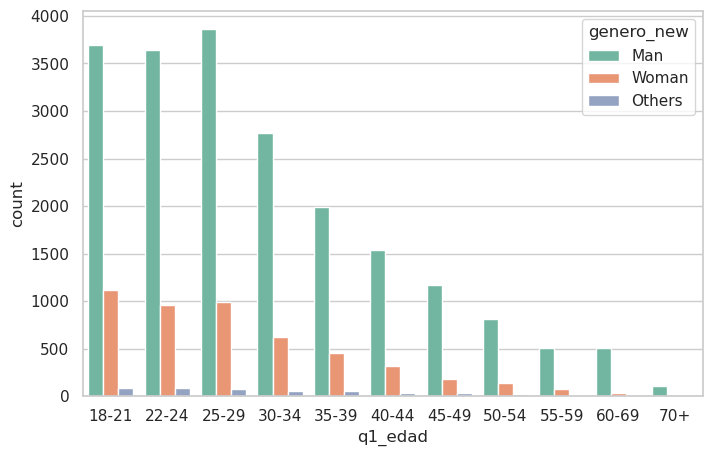

In [107]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(x = 'q1_edad', 
data=df_perfil, 
hue = 'genero_new', 
palette = 'Set2',
order=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])


# Educacion 

In [108]:
df_perfil['q4_educacion'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: q4_educacion, dtype: int64

In [109]:
df_perfil['educacion_new'] = df_perfil['q4_educacion'].replace({
'Master’s degree': 'Master’s degree', 
'Bachelor’s degree': 'Bachelor’s degree', 
'Doctoral degree': 'Doctoral degree',
'Professional doctorate': 'Professional doctorate',
'No formal education past high school': 'Others', 
'Some college/university study without earning a bachelor’s degree': 'Others', 
'I prefer not to answer': 'Others'}) 

In [110]:
df_perfil['educacion_new'].value_counts()

Master’s degree           10132
Bachelor’s degree          9907
Doctoral degree            2795
Others                     2779
Professional doctorate      360
Name: educacion_new, dtype: int64

<AxesSubplot:xlabel='q1_edad', ylabel='count'>

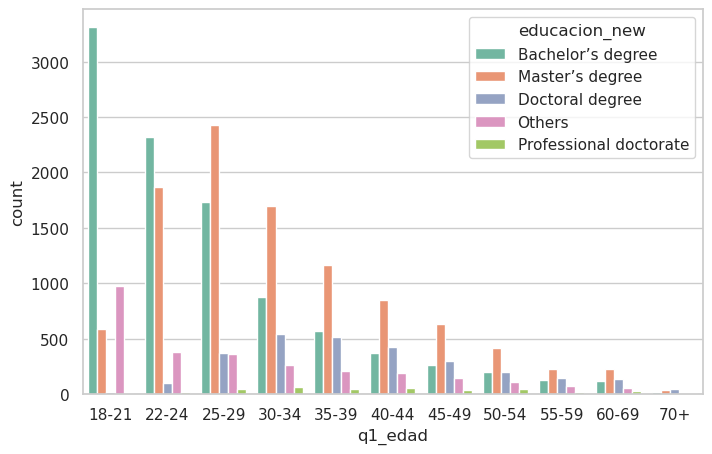

In [111]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.countplot(x = 'q1_edad', 
data=df_perfil, 
hue = 'educacion_new', 
palette = 'Set2',
order=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'])

# Ocupacion

In [112]:
df_perfil['q5_ocupacion'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: q5_ocupacion, dtype: int64

In [113]:
df_perfil['ocupacion_stu'] = df_perfil['q5_ocupacion'].replace({
'Master’s degree': 'Master’s degree', 
'Bachelor’s degree': 'Bachelor’s degree', 
'Doctoral degree': 'Doctoral degree',
'Professional doctorate': 'Professional doctorate',
'No formal education past high school': 'Others', 
'Some college/university study without earning a bachelor’s degree': 'Others', 
'I prefer not to answer': 'Others'}) 

# Experiencia

In [114]:
df_perfil['q6_exp_tech'].value_counts()

1-3 years                    7874
< 1 years                    5881
3-5 years                    4061
5-10 years                   3099
10-20 years                  2166
20+ years                    1860
I have never written code    1032
Name: q6_exp_tech, dtype: int64

In [115]:
df_perfil['experiencia'] = df_perfil['q6_exp_tech'].replace({
'1-3 years': '1-3 years', 
'< 1 years': '< 1 years', 
'I have never written code': 'Never',
'3-5 years': '3-5 years',
'5-10 years': '5-10 years', 
'10-20 years': '10-20 years',
'20+ years': '20+ years'}) 

In [116]:
df_perfil['experiencia'].value_counts()

1-3 years      7874
< 1 years      5881
3-5 years      4061
5-10 years     3099
10-20 years    2166
20+ years      1860
Never          1032
Name: experiencia, dtype: int64

In [117]:
#order=['Data Analyst','Data Scientist','Data Engineer',
# 'Research Scientist','Business Analyst','DBA/Database Engineer','Machine Learning Engineer',
# 'Program/Project Manager','Product Manager','Statistician ','Developer Relations/Advocacy',
# 'Student ','Other','Currently not employed'] #

<AxesSubplot:xlabel='Count', ylabel='q5_ocupacion'>

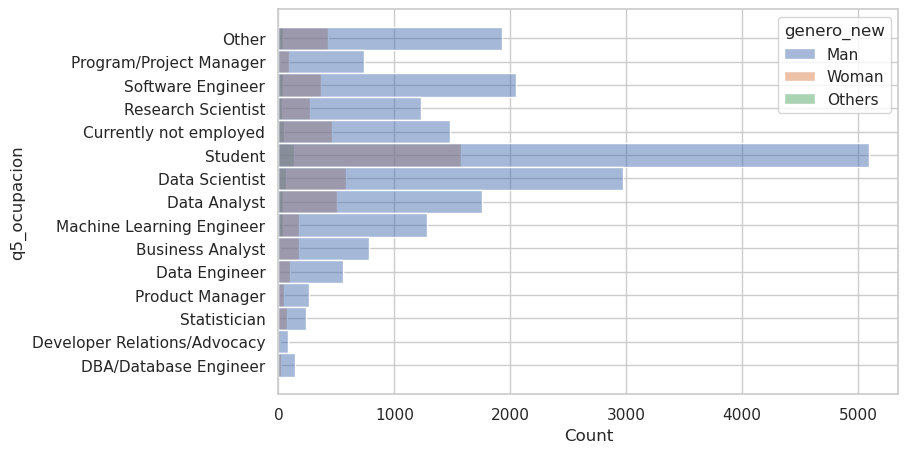

In [118]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.histplot(y= "q5_ocupacion",  data=df_perfil, hue="genero_new"  )

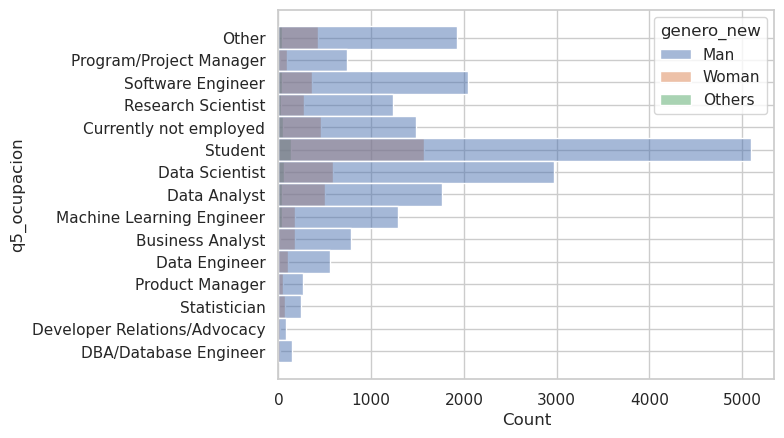

In [119]:
fig = sns.histplot(y= "q5_ocupacion",  data=df_perfil, hue="genero_new" )

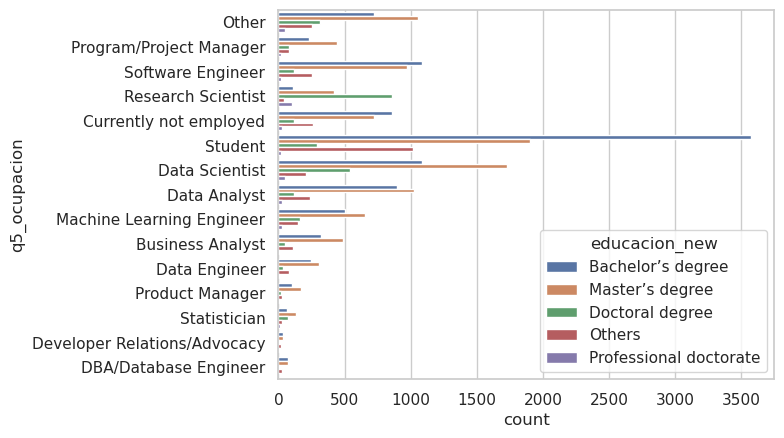

In [120]:
sns.countplot(data=df_perfil , y= "q5_ocupacion" , hue= 'educacion_new');

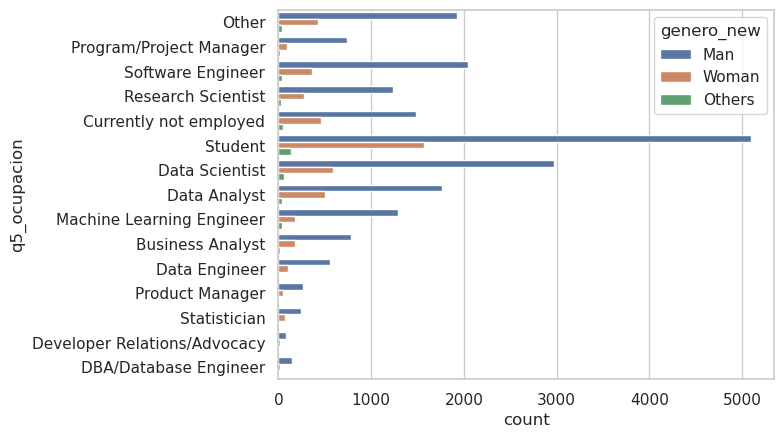

In [121]:
sns.countplot(data=df_perfil , y= 'q5_ocupacion', hue=  "genero_new");

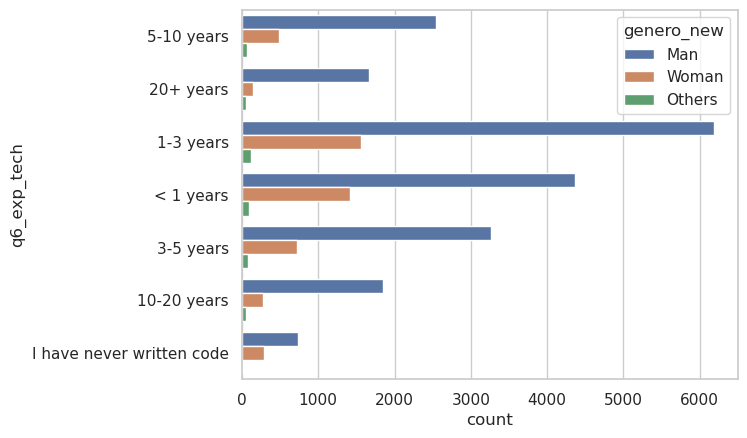

In [122]:
sns.countplot(data=df_perfil , y= 'q6_exp_tech', hue=  "genero_new");